In [1]:
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import pandas as pd
import os
import anndata as ad
import scipy as sp

In [2]:
adata = sc.read_h5ad('../../results/cell_2022/scrna.skin.annotated.h5ad')

In [3]:
adata.uns['log1p']['base'] = None

In [4]:
# find marker genes
sc.tl.rank_genes_groups(adata, 'cell_type', method='wilcoxon')

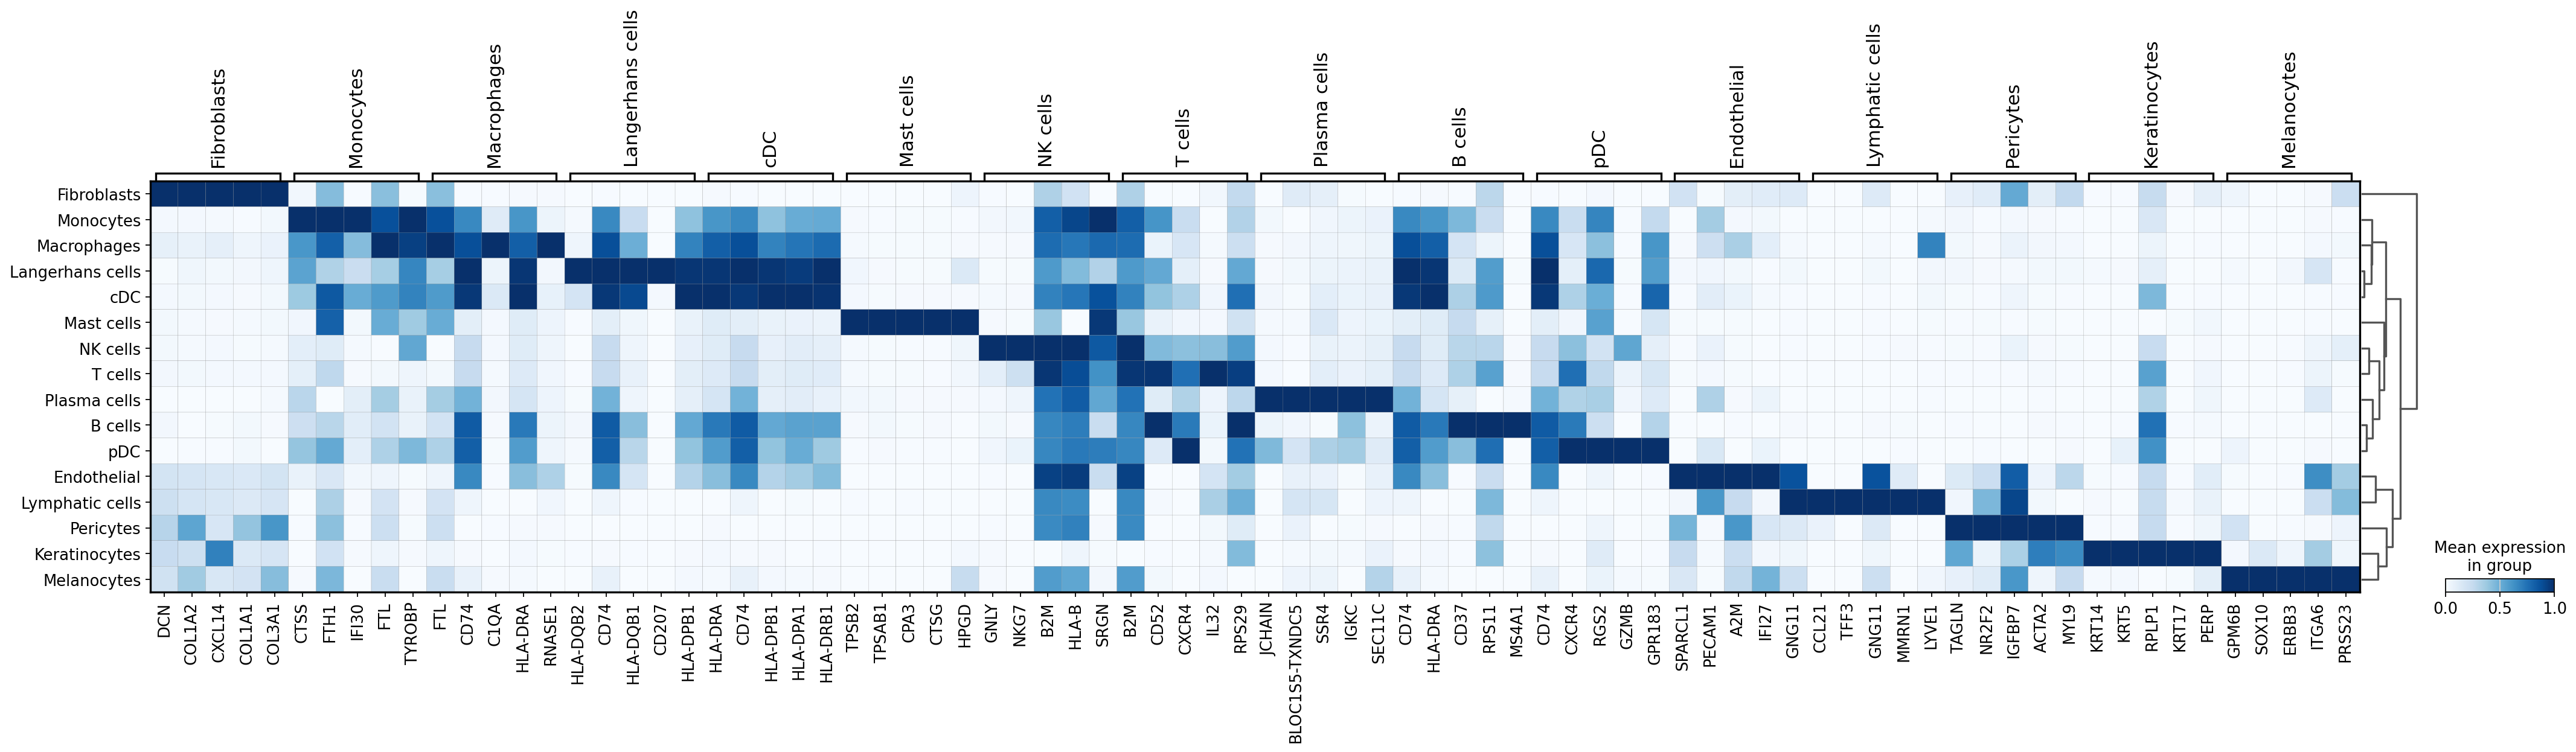

In [5]:
sc.set_figure_params(figsize=(6, 9))

sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, standard_scale='var', cmap='Blues')

In [6]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names']}).head(20)

In [7]:
df.to_csv('../../results/cell_2022/cell_type_markers.csv')

In [8]:
df

,B cells_n,Endothelial_n,Fibroblasts_n,Keratinocytes_n,Langerhans cells_n,Lymphatic cells_n,Macrophages_n,Mast cells_n,Melanocytes_n,Monocytes_n,NK cells_n,Pericytes_n,Plasma cells_n,T cells_n,cDC_n,pDC_n
0,CD74,SPARCL1,DCN,KRT14,HLA-DQB2,CCL21,FTL,TPSB2,GPM6B,CTSS,GNLY,TAGLN,JCHAIN,B2M,HLA-DRA,CD74
1,HLA-DRA,PECAM1,COL1A2,KRT5,CD74,TFF3,CD74,TPSAB1,SOX10,FTH1,NKG7,NR2F2,BLOC1S5-TXNDC5,CD52,CD74,CXCR4
2,CD37,A2M,CXCL14,RPLP1,HLA-DQB1,GNG11,C1QA,CPA3,ERBB3,IFI30,B2M,IGFBP7,SSR4,CXCR4,HLA-DPB1,RGS2
3,RPS11,IFI27,COL1A1,KRT17,CD207,MMRN1,HLA-DRA,CTSG,ITGA6,FTL,HLA-B,ACTA2,IGKC,IL32,HLA-DPA1,GZMB
4,MS4A1,GNG11,COL3A1,PERP,HLA-DPB1,LYVE1,RNASE1,HPGD,PRSS23,TYROBP,SRGN,MYL9,SEC11C,RPS29,HLA-DRB1,GPR183
5,RPLP2,CCL14,CFD,DSP,HLA-DRB1,FABP4,TYROBP,MS4A2,SPTBN1,AIF1,CCL5,CALD1,MZB1,RPL28,LYZ,JCHAIN
6,IGHM,VWF,APOD,DST,HLA-DRA,TM4SF1,HLA-DRB1,KIT,PLPP1,FTH1P8,HLA-C,SYNPO2,XBP1,TMSB4X,HLA-DQB1,IGKC
7,CD52,CD74,CCDC80,COL17A1,HLA-DPA1,TFPI,C1QB,FOSB,GNAS,SAT1,LCP1,STEAP4,IGLC1,HLA-B,CST3,HLA-DRA
8,IGKC,HLA-E,MMP2,RPL3P4,FCGBP,GNAS,MS4A6A,SRGN,PLP1,SRGN,MALAT1,RGS5,FKBP11,RPS19,HLA-DQA1,MALAT1
9,RPS29,TM4SF1,CTSK,AC016739.1,CD1A,FXYD6,HLA-DPA1,ANXA1,CDH19,LYZ,KLRB1,NOTCH3,IGHG1,RPL23A,TMSB4X,RGS1


In [9]:
marker_genes2 = {'Keratinocytes': ['KRT1', 'KRT10', 'KRT14', 'KRT5', 'KRT17', 'KRT2'],
                 'Endothelial': ['AQP1', 'IFI27', 'CCL21', 'CLDN5', 'RAMP2'],
                 'Fibroblasts': ['SFRP2', 'COMP', 'DCN', 'APOD', 'CCL19', 'APOE', 'POSTN', 'COCH', 'ASPN'],
                 'Pericytes': ['RGS5', 'GEM', 'TAGLN', 'RERGL'],
                 'T_NK_Cells': ['CXCR4', 'IL32'],
                 'Macrophage/DC': ['CCL3'],
                 'Secretory': ['KRT19', 'SCGB2A2','MUCL1'],
                 # 'Smooth_Muscle': ['DES'],
                 'Neural': ['PLP1', 'PMP22'],
                 # 'Proliferating_cells': ['STMN1', 'PTTG1'],
                 # 'Mast_cells': ['TPSAB1', 'FTH1'],
                 # 'Melanocytes': ['TYRP1', 'PMEL'],
                 # 'Preadipocyte': ['APOC1', 'APMAP'],
                 # 'Cornified_envelope_Cells': ['LOR', 'SPRR2G'],
                 # 'Schwann_cells': ['MPZ', 'MBP'],
                 # 'Plasma_cells': ['IGHG3']
                }

categories: B cells, Endothelial, Fibroblasts, etc.
var_group_labels: Keratinocytes, Endothelial, Fibroblasts, etc.


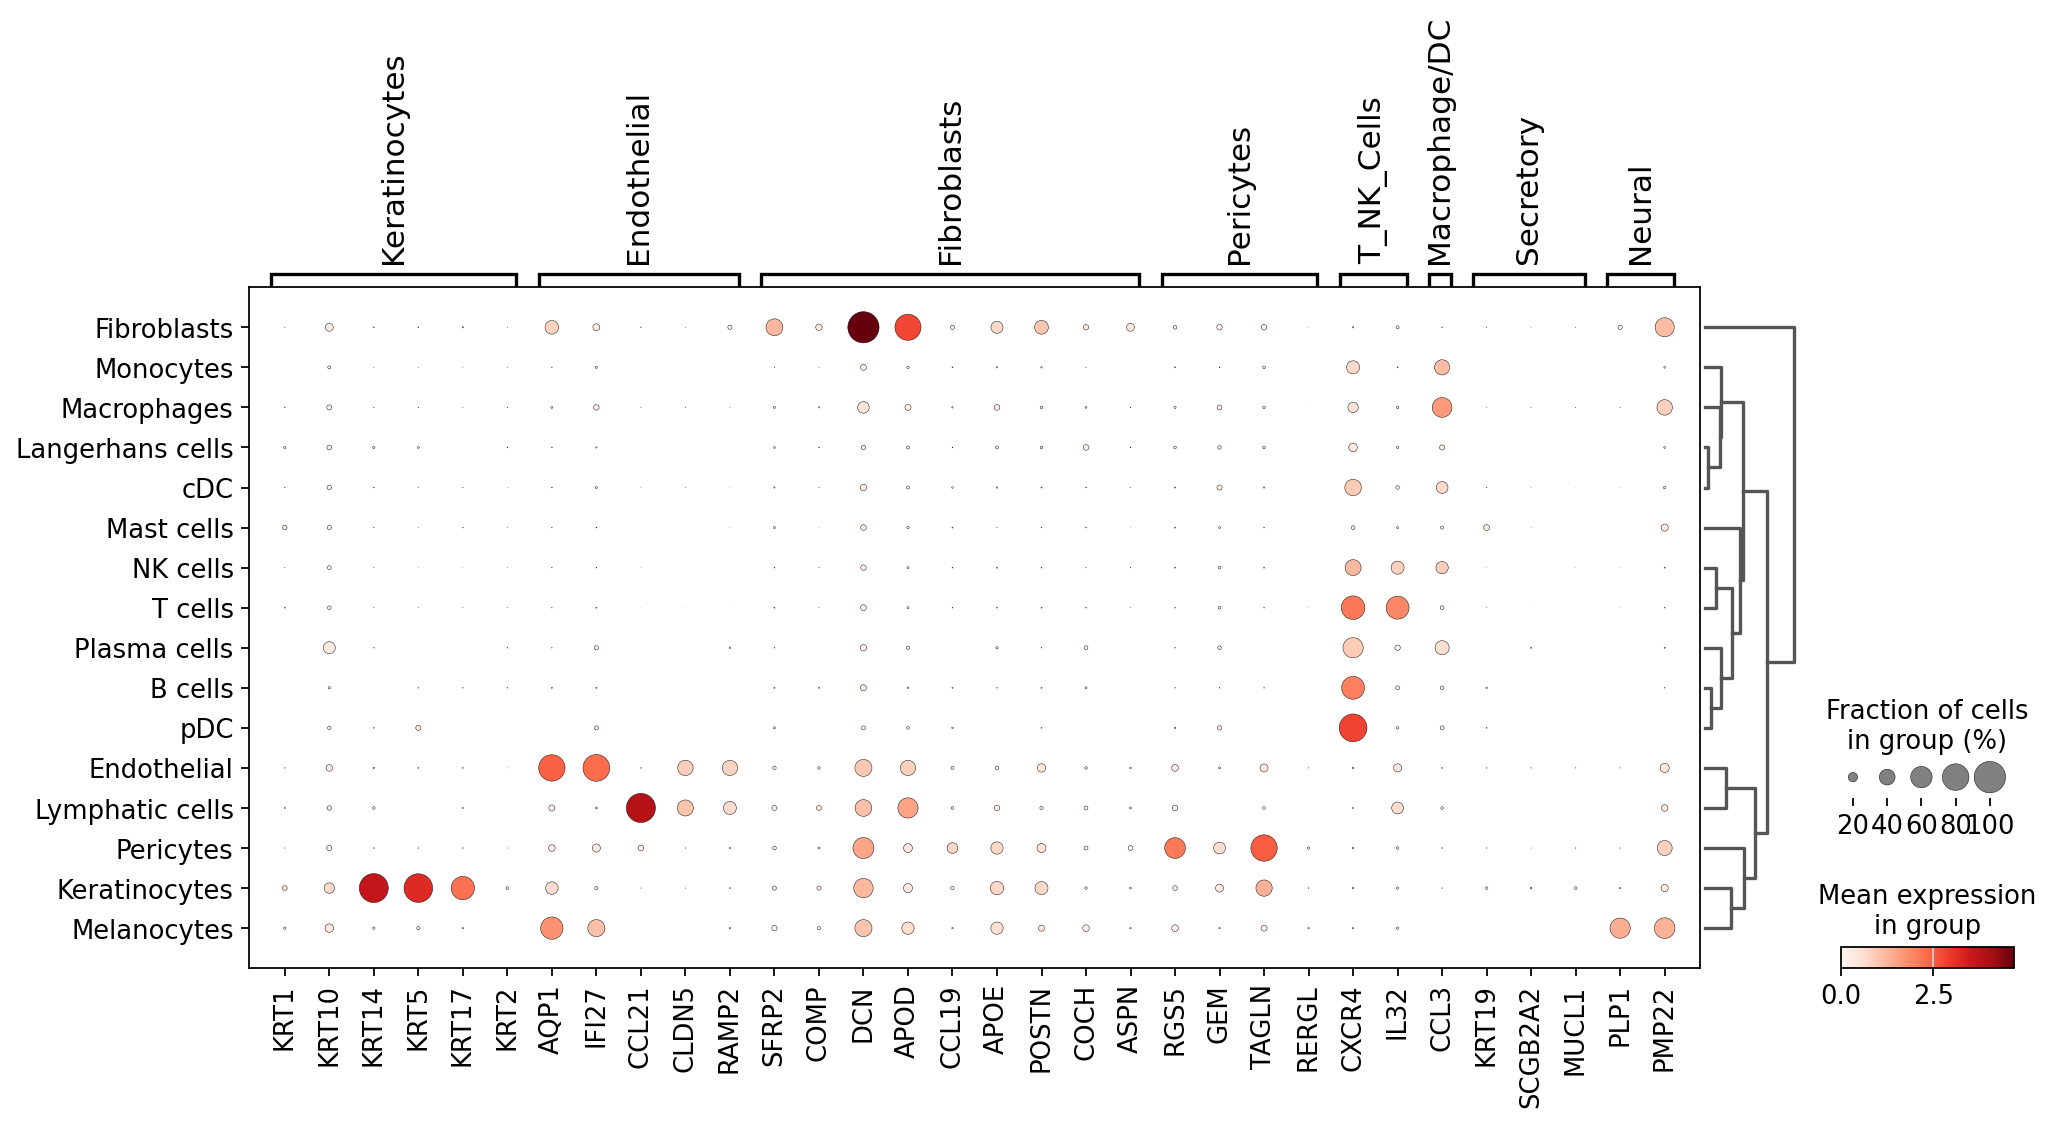

In [10]:
sc.pl.dotplot(adata, marker_genes2, groupby='cell_type', dendrogram=True)